<a href="https://colab.research.google.com/github/suzzingV/Time-Series-Analysis/blob/main/ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Example 2.1 : 선형모형 적합

install.packages("lmtest")
library(lmtest)
z <- scan("/content/population.txt")
pop = round(z/10000)
pop=ts(pop, start=c(1960))
t <- 1:length(pop)
t2 = t * t
m1 <- lm(pop ~ t) # 선형 회귀 모델 이용 -> 회귀분석
dwtest(m1) # 자기 상관 검정
summary(m1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Durbin-Watson test

data:  m1
DW = 0.041645, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



Call:
lm(formula = pop ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-115.40  -48.30   16.87   54.37   63.29 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2559.3889    20.0385  127.72   <2e-16 ***
t             57.0135     0.9444   60.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 58.87 on 34 degrees of freedom
Multiple R-squared:  0.9908,	Adjusted R-squared:  0.9905 
F-statistic:  3644 on 1 and 34 DF,  p-value: < 2.2e-16


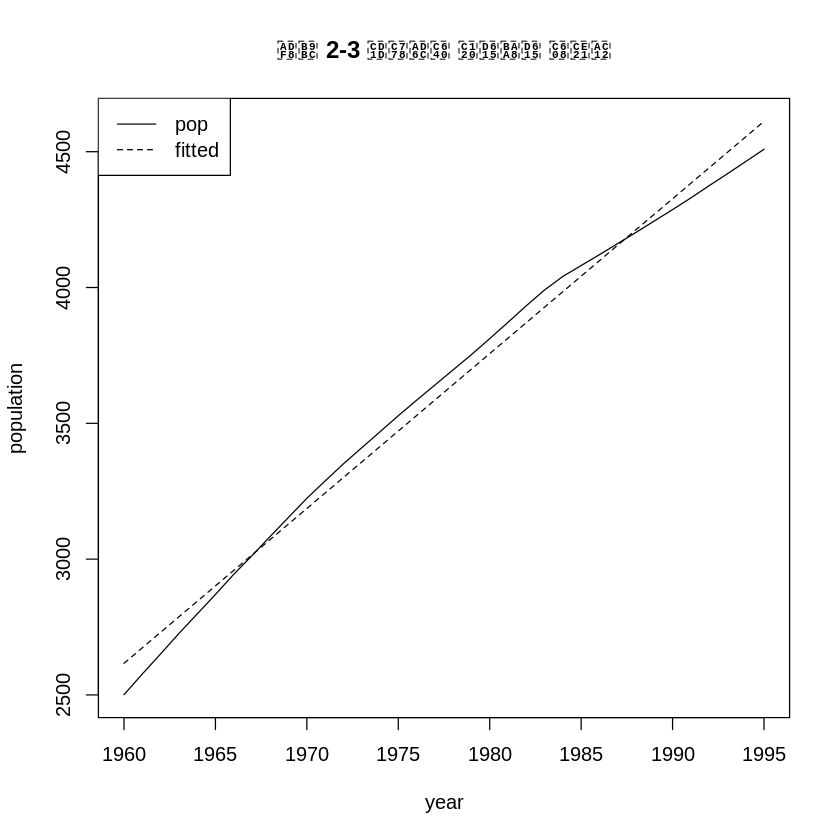

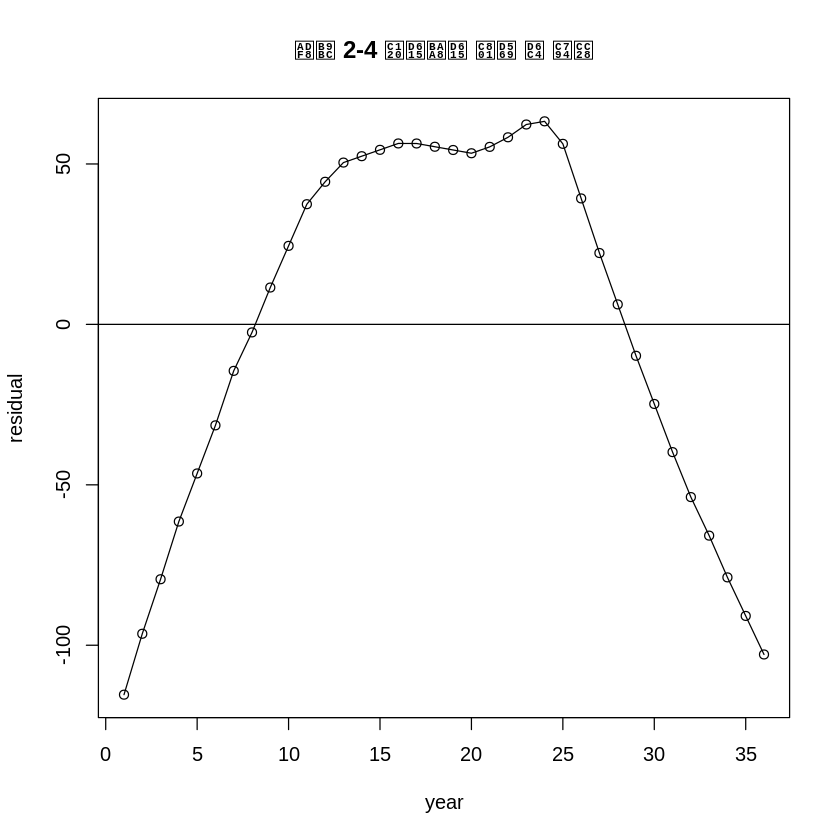

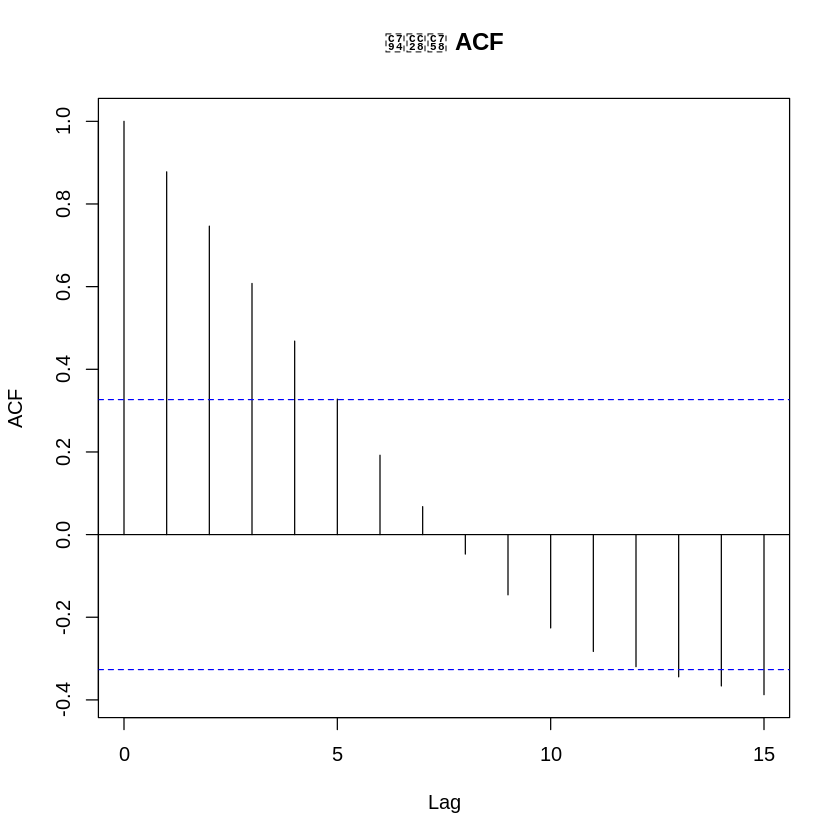

In [ ]:
ts.plot(pop, fitted(m1), xlab = "year", ylab = "population", lty = 1:2, main = "그림 2-3 총인구와 선형모형 예측값")
legend("topleft", legend = c("pop", "fitted"), lty = 1:2)
ts.plot(resid(m1), type = "o", xlab = "year", ylab = "residual", main = "그림 2-4 선형모형 적합 후 잔차"); abline(h=0) #비선형성 위반
acf(resid(m1), main = "잔차의 ACF") # 유의미한 자기 상관성 없음

In [ ]:
m2 <- lm(pop ~ t + t2) # 2차 적합
summary(m2) # 잔차의 범위 넓음 -> 이분산성 가능성, 1사분위, 3사분위 차이 큼 -> 이분산성 가능성


Call:
lm(formula = pop ~ t + t2)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.365  -4.779  -1.049   3.798  17.631 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2421.49090    4.05820  596.69   <2e-16 ***
t             78.78688    0.50576  155.78   <2e-16 ***
t2            -0.58847    0.01326  -44.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.67 on 33 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9998 
F-statistic: 1.083e+05 on 2 and 33 DF,  p-value: < 2.2e-16


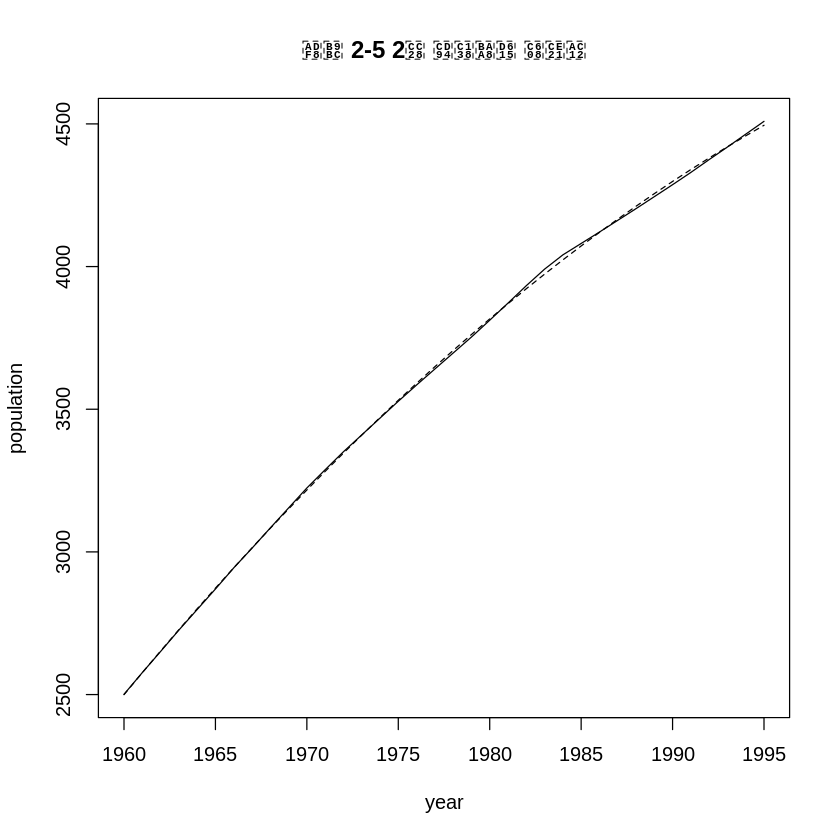

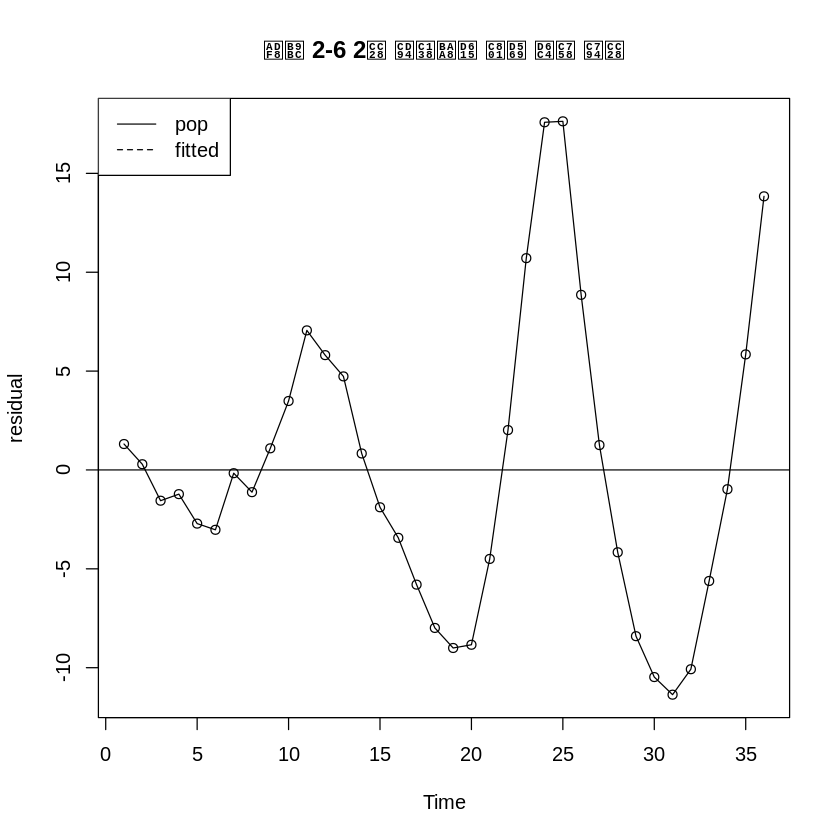

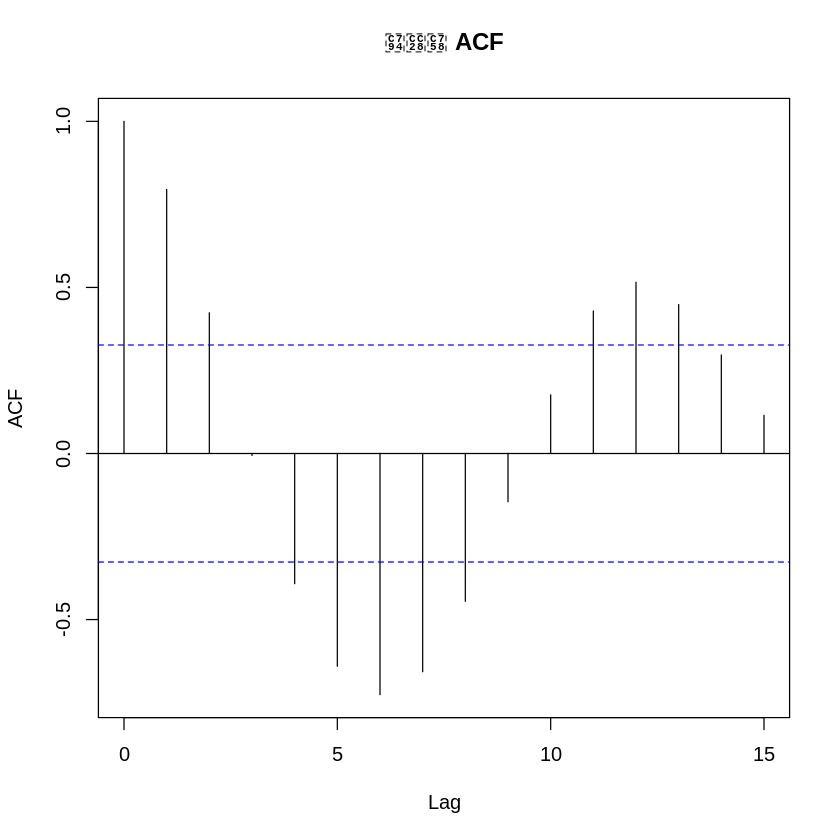

In [ ]:
ts.plot(pop, fitted(m2), xlab = "year", ylab = "population", lty = 1:2, main = "그림 2-5 2차 추세모형 예측값")
ts.plot(resid(m2), type = "o", ylab = "residual", main = "그림 2-6 2차 추세모형 적합 후의 잔차"); abline(h = 0)
legend("topleft", legend = c("pop", "fitted"), lty = 1:2)
acf(resid(m2), main = "잔차의 ACF") # 유의 수준선은 95% 신뢰구간 표준오차의 +-1.96


	Durbin-Watson test

data:  m3
DW = 0.16493, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



Call:
lm(formula = lnpop ~ t + t2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009306 -0.003520 -0.000374  0.003284  0.010159 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.807e+00  2.360e-03 3307.25   <2e-16 ***
t            2.740e-02  2.942e-04   93.14   <2e-16 ***
t2          -3.004e-04  7.712e-06  -38.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004461 on 33 degrees of freedom
Multiple R-squared:  0.9994,	Adjusted R-squared:  0.9993 
F-statistic: 2.664e+04 on 2 and 33 DF,  p-value: < 2.2e-16


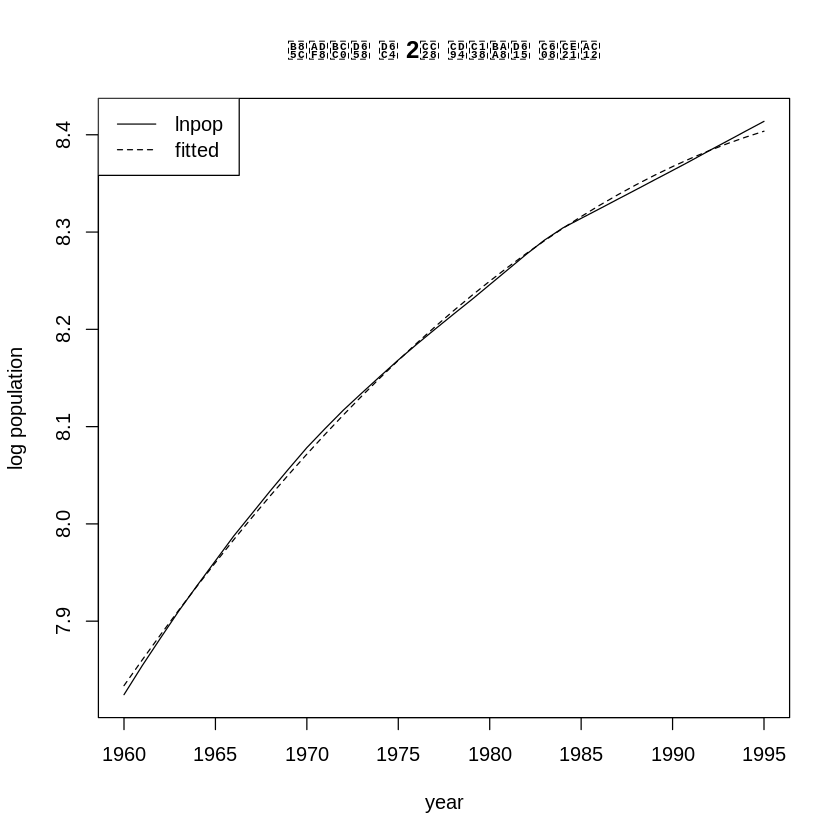

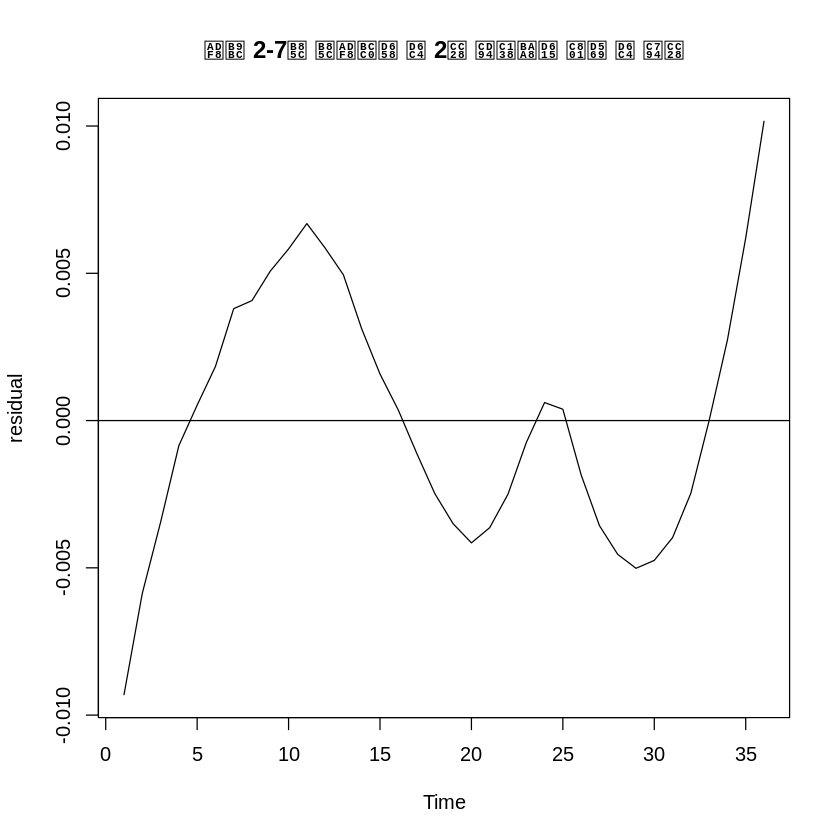

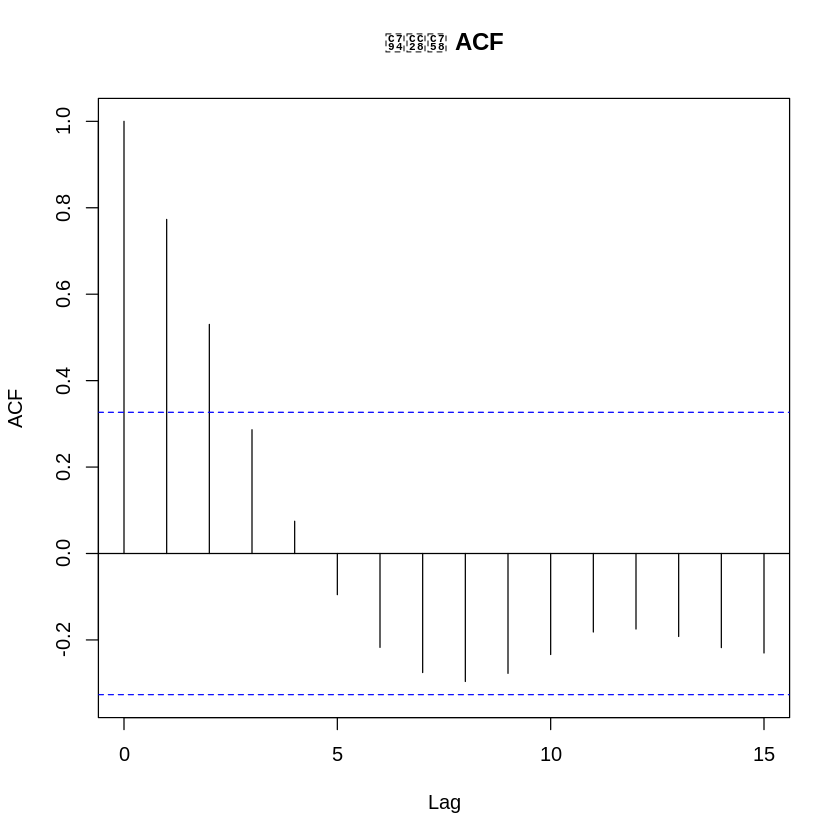

In [ ]:
lnpop <- log(pop)
m3 <- lm(lnpop ~ t + t2)
dwtest(m3)
summary(m3)
ts.plot(lnpop, fitted(m3), xlab = "year", ylab = "log population", lty = 1:2, main = "로그변환 후 2차 추세모형 예측값")
legend("topleft", legend = c("lnpop", "fitted"), lty = 1:2)
ts.plot(resid(m3), ylab = "residual", main = "그림 2-7로 로그변환 후 2차 추세모형 적합 후 잔차");abline(h=0)
acf(resid(m3), main="잔차의 ACF")

In [ ]:
## Example 2.2 : 지시함수를 이용한 계절모형 적합
install.packages("astsa")
library(astsa)
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



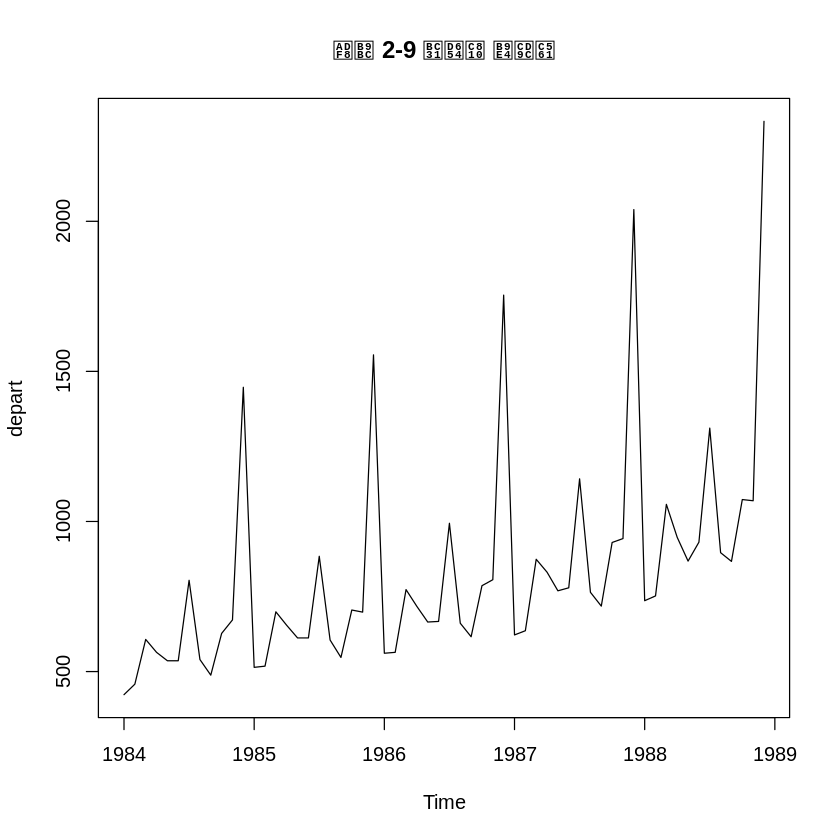

In [ ]:
z <- scan("/content/depart.txt")
dep <- ts(z, frequency = 12, start=c(1984, 1))
ts.plot(dep, ylab = "depart", main = "그림 2-9 백화점 매출액")

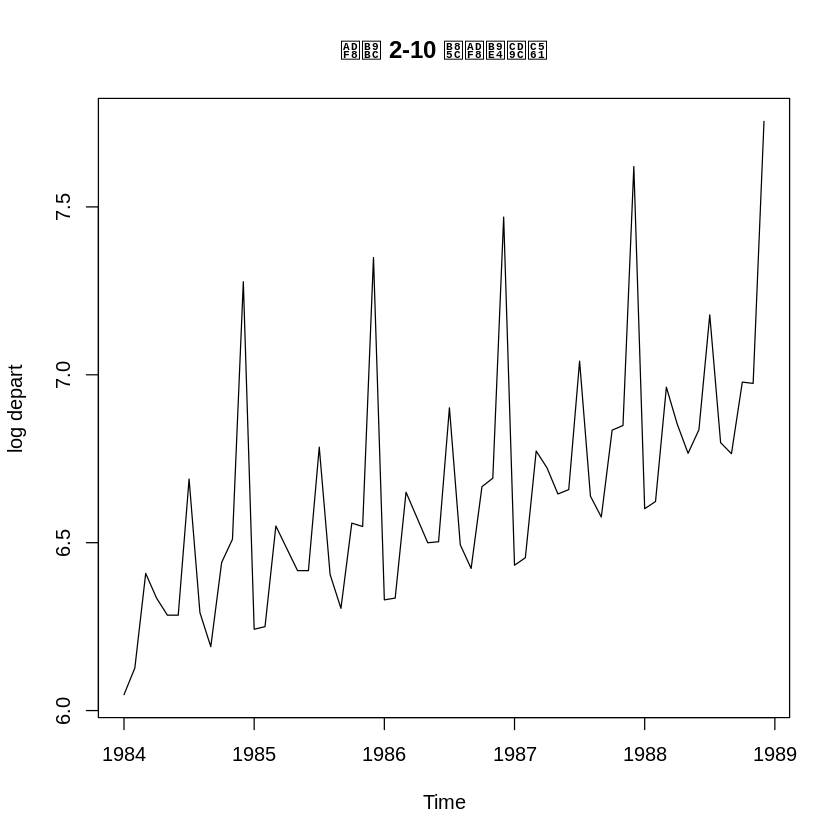

In [ ]:
lndep <- log(dep)
ts.plot(lndep, ylab = "log depart", main = "그림 2-10 로그매출액")

In [ ]:
trend = time(lndep) - 1984 # 기점을 1984로 설정
y = factor(cycle(lndep)) #factor을 이용한 월별 factor 생성 # 시계열 데이터의 계절성 반영
reg <- lm(lndep ~ 0 + trend + y) # 여기서 0 +는 모델에 절편을 포함하지 않도록 하는데, 이는 각 월별 요인(y)이 이미 데이터의 평균적인 수준을 포착하므로 절편이 필요 없다는 것을 의미합니다. trend는 시간 추세를 반영하고, y는 월별 계절성을 반영합니다.
dwtest(reg)
summary(reg)


	Durbin-Watson test

data:  reg
DW = 0.82642, p-value = 2.39e-06
alternative hypothesis: true autocorrelation is greater than 0



Call:
lm(formula = lndep ~ 0 + trend + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.038679 -0.018689 -0.001468  0.015185  0.057288 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
trend  0.12792    0.00231   55.39   <2e-16 ***
y1     6.07485    0.01222  497.07   <2e-16 ***
y2     6.09146    0.01230  495.43   <2e-16 ***
y3     6.39178    0.01237  516.64   <2e-16 ***
y4     6.30601    0.01245  506.47   <2e-16 ***
y5     6.22390    0.01253  496.62   <2e-16 ***
y6     6.23044    0.01262  493.84   <2e-16 ***
y7     6.59917    0.01270  519.51   <2e-16 ***
y8     6.19494    0.01279  484.31   <2e-16 ***
y9     6.11078    0.01288  474.36   <2e-16 ***
y10    6.34411    0.01298  488.94   <2e-16 ***
y11    6.35237    0.01307  486.00   <2e-16 ***
y12    7.12114    0.01317  540.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0253 on 47 degrees of freedom
Multiple R-squared:      1,	Adjusted R-square

,trend,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12
1,0.00000000,1,0,0,0,0,0,0,0,0,0,0,0
2,0.08333333,0,1,0,0,0,0,0,0,0,0,0,0
3,0.16666667,0,0,1,0,0,0,0,0,0,0,0,0
4,0.25000000,0,0,0,1,0,0,0,0,0,0,0,0
5,0.33333333,0,0,0,0,1,0,0,0,0,0,0,0
6,0.41666667,0,0,0,0,0,1,0,0,0,0,0,0
7,0.50000000,0,0,0,0,0,0,1,0,0,0,0,0
8,0.58333333,0,0,0,0,0,0,0,1,0,0,0,0
9,0.66666667,0,0,0,0,0,0,0,0,1,0,0,0
10,0.75000000,0,0,0,0,0,0,0,0,0,1,0,0


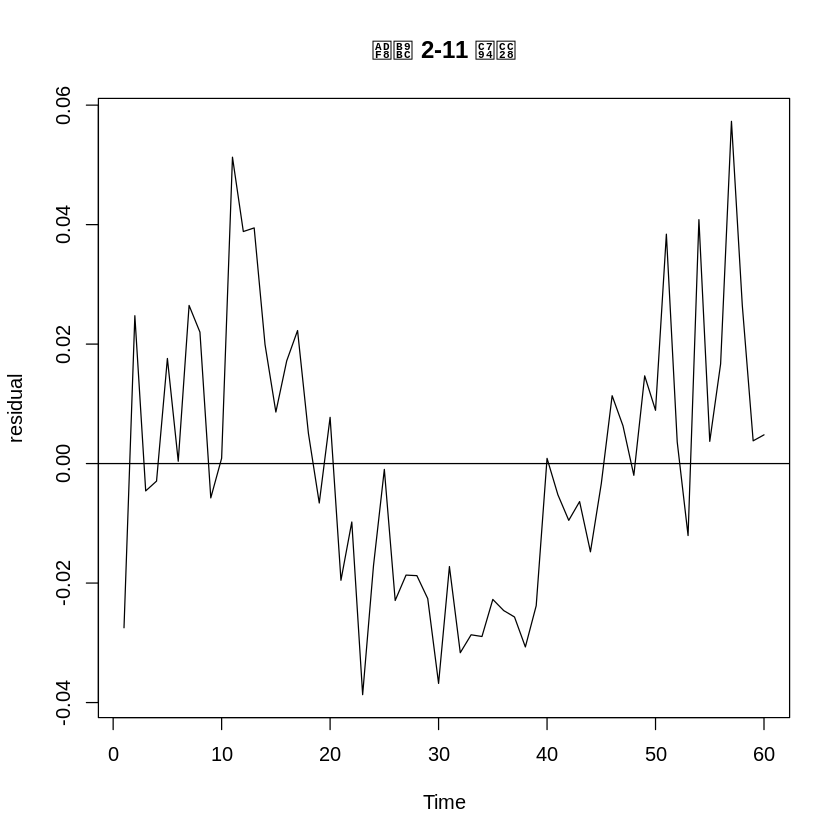

ACF,0.57,0.50,0.58,0.42,0.45,0.42,0.26,0.22,0.21,0.02,0.04,-0.09,-0.14,-0.12,-0.19,-0.28,-0.28,-0.32
PACF,0.57,0.25,0.35,-0.04,0.15,-0.01,-0.15,-0.12,-0.01,-0.26,0.00,-0.24,0.07,-0.05,0.09,-0.16,0.04,-0.12


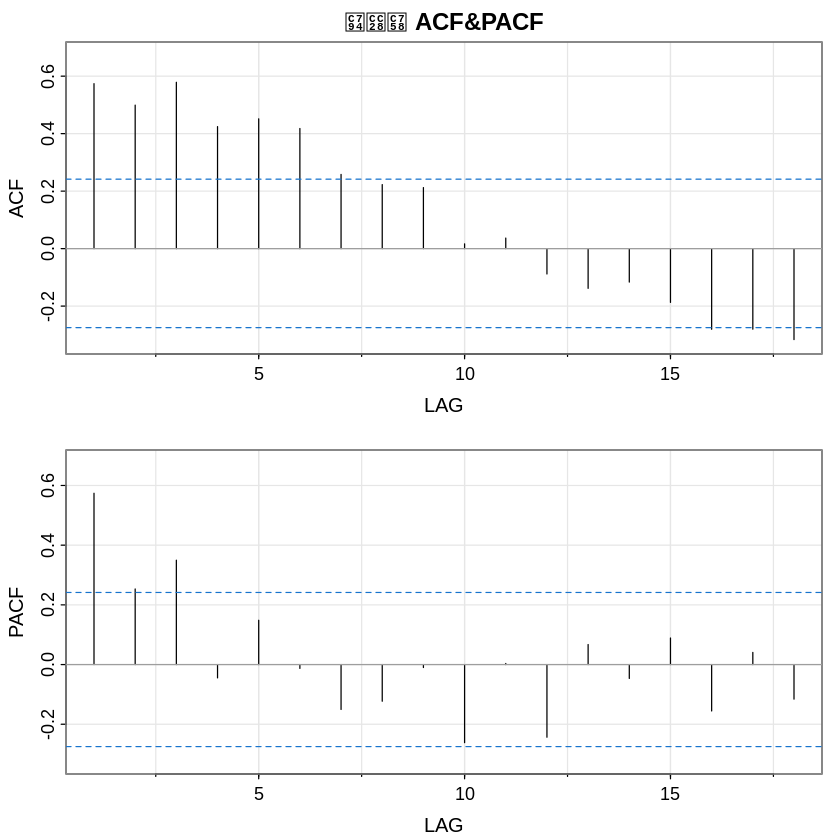

In [ ]:
model.matrix(reg) # 모형 계획행렬
resid = ts(resid(reg), start = c(1984, 1), frequency = 12)
ts.plot(resid(reg), ylab = "residual", main = "그림 2-11 잔차"); abline(h=0)
acf2(resid(reg), main = "잔차의 ACF&PACF")

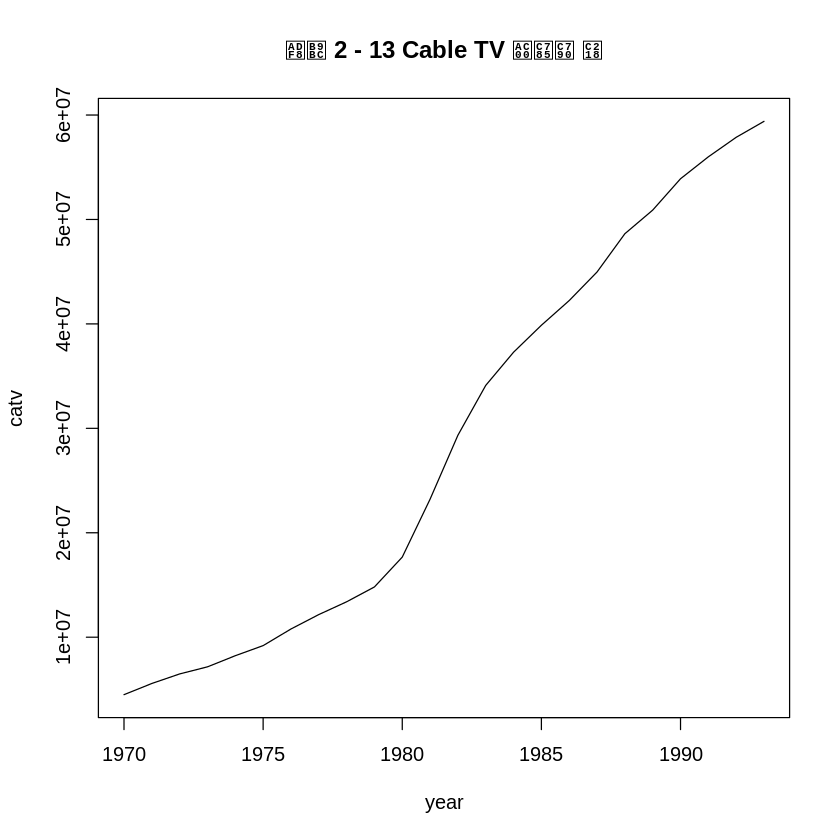


Call:
lm(formula = lncatv ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17388 -0.09974 -0.01448  0.07133  0.29312 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.015622   0.056269   53.59   <2e-16 ***
t           -0.199364   0.003938  -50.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1335 on 22 degrees of freedom
Multiple R-squared:  0.9915,	Adjusted R-squared:  0.9911 
F-statistic:  2563 on 1 and 22 DF,  p-value: < 2.2e-16


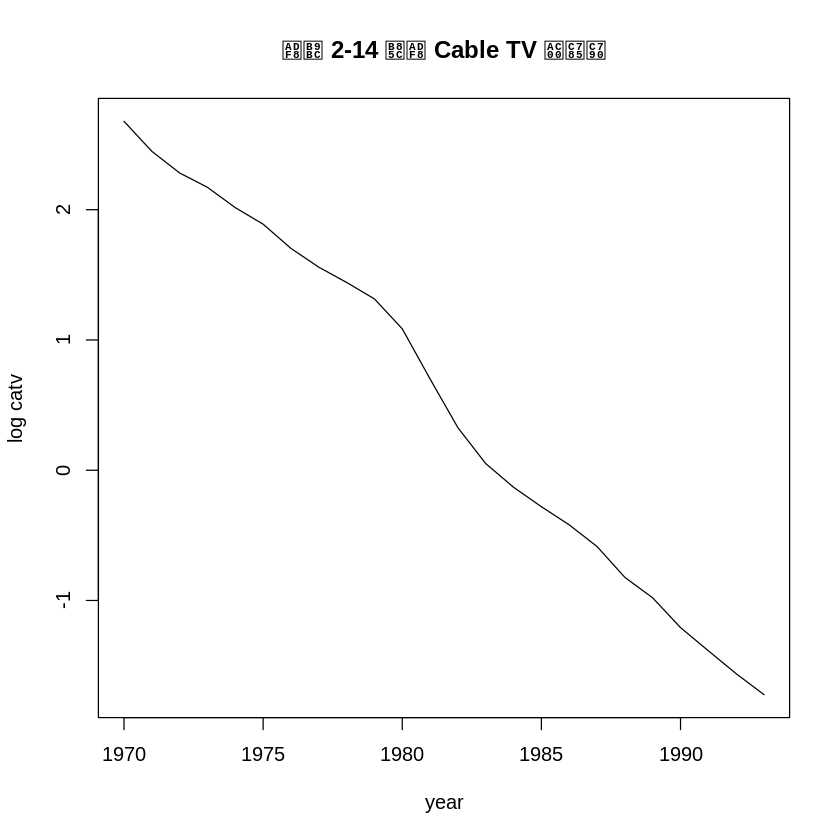

In [ ]:
## Example 2.3: 비선형모형, Cable TV 자료
library(astsa)
z <- scan("/content/catv.txt")
k = 70000000
t <- 1 : length(z)
year <- t + 1969
catv <- ts(z, start = c(1970))
lncatv <- log(k/catv - 1)
ts.plot(catv, xlab = "year", ylab = "catv", main = "그림 2 - 13 Cable TV 가입자 수")
ts.plot(lncatv, xlab = "year", ylab = "log catv", main = "그림 2-14 로그 Cable TV 가입자")
fit <- lm(lncatv~t)
summary(fit)

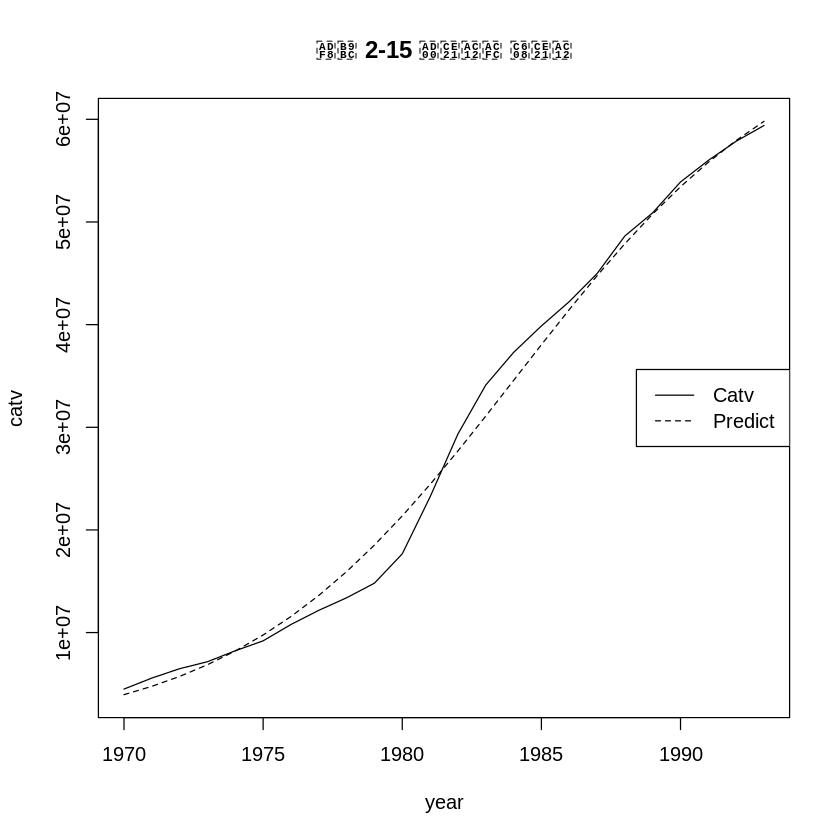

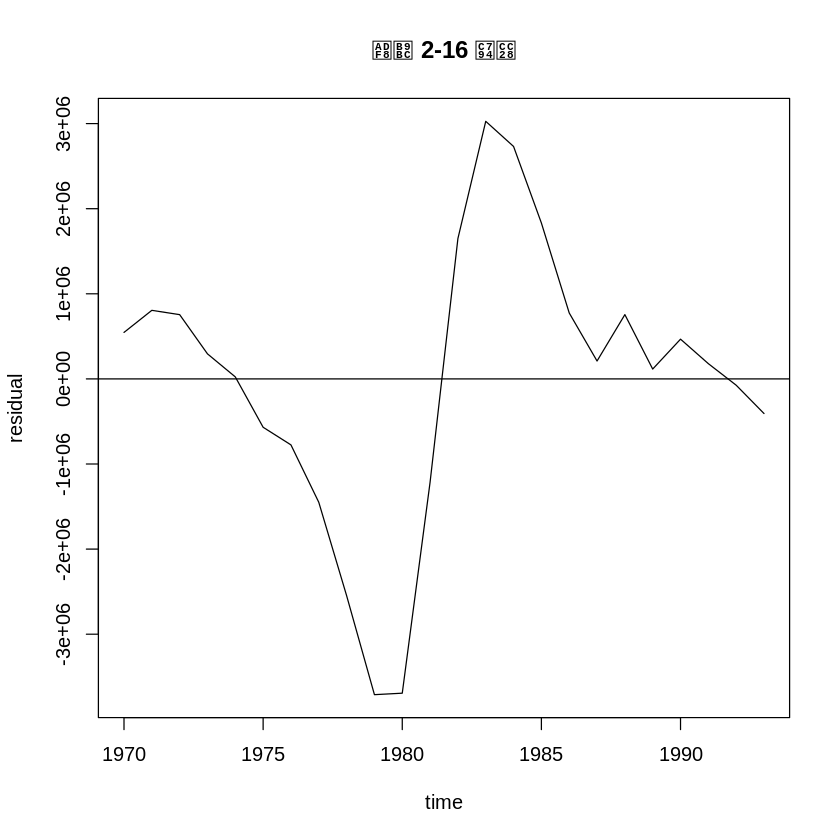

ACF,0.81,0.41,-0.01,-0.28,-0.38,-0.37,-0.34,-0.30
PACF,0.81,-0.76,0.14,0.13,-0.31,-0.13,-0.13,0.05


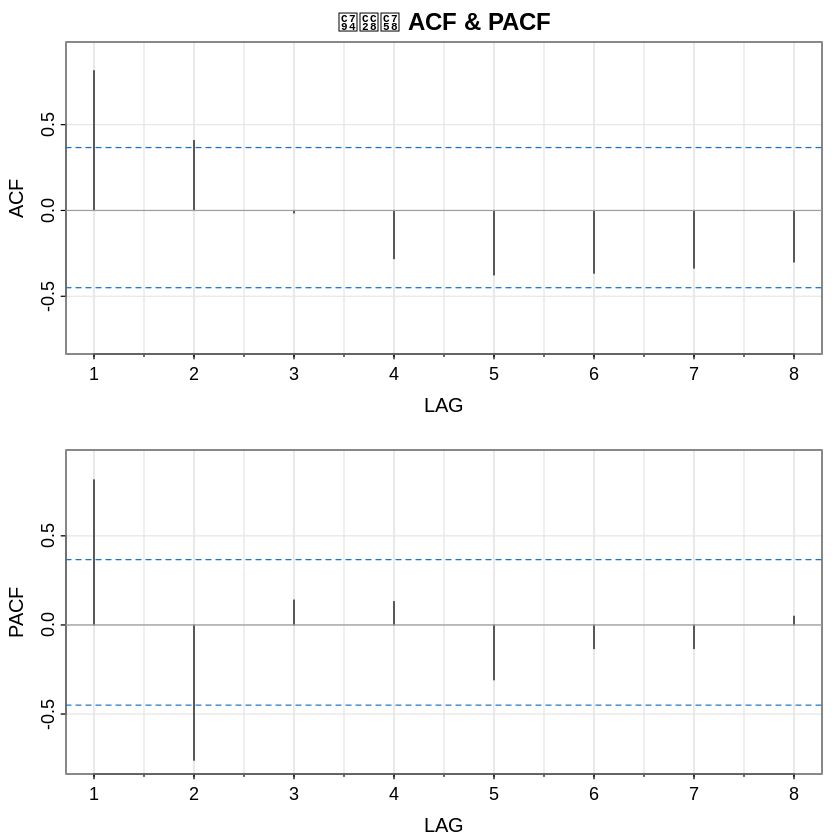

In [ ]:
pred = k/(exp(fitted(fit)) + 1) #CATV 예측값
resid = catv - pred #잔차
y <- data.frame(catv, pred)
fig <-ts(y, start = c(1970))
ts.plot(fig, xlab = "year", ylab = "catv", lty = 1:2, main = "그림 2-15 관측값과 예측값")
legend("right", legend = c("Catv", "Predict"), lty = 1:2)
ts.plot(resid, xlab = "time", ylab="residual", main = "그림 2-16 잔차");abline(h=0)
acf2(resid, main = "잔차의 ACF & PACF")

In [ ]:
## Example 2.4: 자기회귀오차모형
library(astsa)
dept <- scan("/content/depart.txt")
n <- 1:length(dept)
time <- ts(n, frequency = 12, start = c(1984, 1))
dept.ts <- ts(dept, frequency = 12, start = c(1984, 1))
lndept = log(dept.ts)
y = factor(cycle(time))
fit <- lm(lndept~0 + time + y)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
time,1,2.081723e+03,2.081723e+03,3252168.81,2.097341e-115
y,12,5.798938e+02,4.832448e+01,75494.85,2.166679e-96
Residuals,47,3.008484e-02,6.401030e-04,NA,NA



Call:
lm(formula = lndept ~ 0 + time + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.038679 -0.018689 -0.001468  0.015185  0.057288 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
time 0.0106603  0.0001925   55.39   <2e-16 ***
y1   6.0641904  0.0122952  493.21   <2e-16 ***
y2   6.0807995  0.0123718  491.50   <2e-16 ***
y3   6.3811183  0.0124509  512.50   <2e-16 ***
y4   6.2953455  0.0125325  502.32   <2e-16 ***
y5   6.2132392  0.0126164  492.47   <2e-16 ***
y6   6.2197771  0.0127027  489.64   <2e-16 ***
y7   6.5885065  0.0127914  515.08   <2e-16 ***
y8   6.1842831  0.0128823  480.06   <2e-16 ***
y9   6.1001148  0.0129754  470.13   <2e-16 ***
y10  6.3334505  0.0130707  484.56   <2e-16 ***
y11  6.3417116  0.0131681  481.60   <2e-16 ***
y12  7.1104816  0.0132676  535.93   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0253 on 47 degrees of freedom
Multiple R-squared:      1,	Adjusted R-square

ACF,0.57,0.50,0.58,0.42,0.45,0.42,0.26,0.22,0.21,0.02,⋯,0.09,0.14,0.12,0.09,0.19,0.18,0.13,0.17,0.10,0.00
PACF,0.57,0.25,0.35,-0.04,0.15,-0.01,-0.15,-0.12,-0.01,-0.26,⋯,0.02,-0.04,-0.01,-0.14,0.03,-0.05,-0.03,-0.01,-0.18,-0.17


          Length Class  Mode     
coef       4     -none- numeric  
sigma2     1     -none- numeric  
var.coef  16     -none- numeric  
mask       4     -none- logical  
loglik     1     -none- numeric  
aic        1     -none- numeric  
arma       7     -none- numeric  
residuals 60     ts     numeric  
call       3     -none- call     
series     1     -none- character
code       1     -none- numeric  
n.cond     1     -none- numeric  
nobs       1     -none- numeric  
model     10     -none- list     

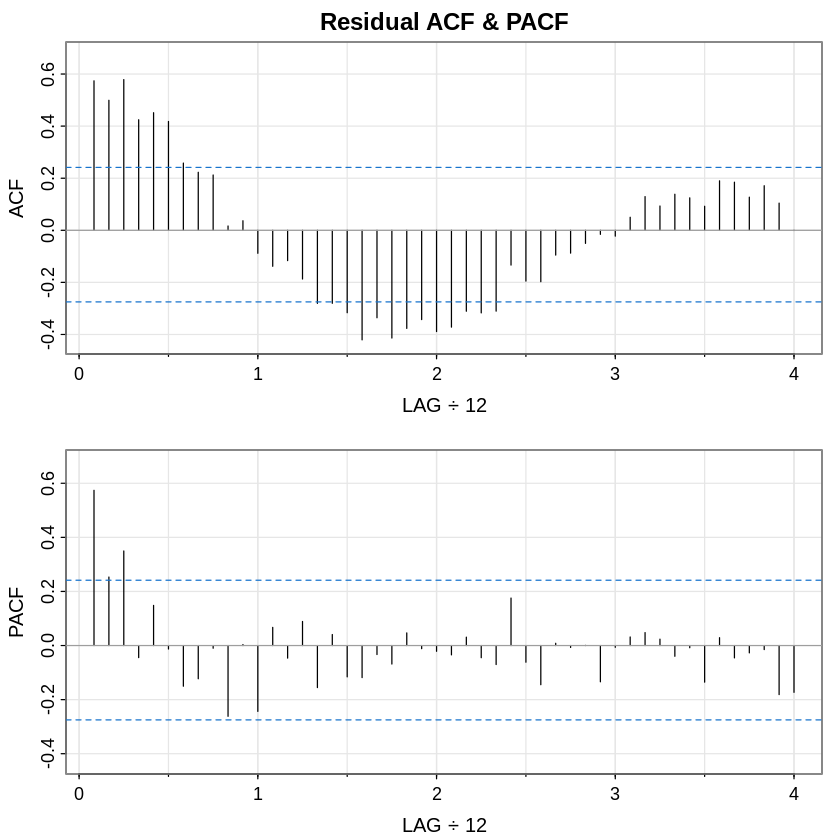

In [ ]:
resid = ts(resid(fit), start = c(1984, 1), frequency = 12)
acf2(resid, main = "Residual ACF & PACF")
autoreg <- arima(residuals(fit), order = c(3, 0, 0)) # 자기회귀오차모형
summary(autoreg)

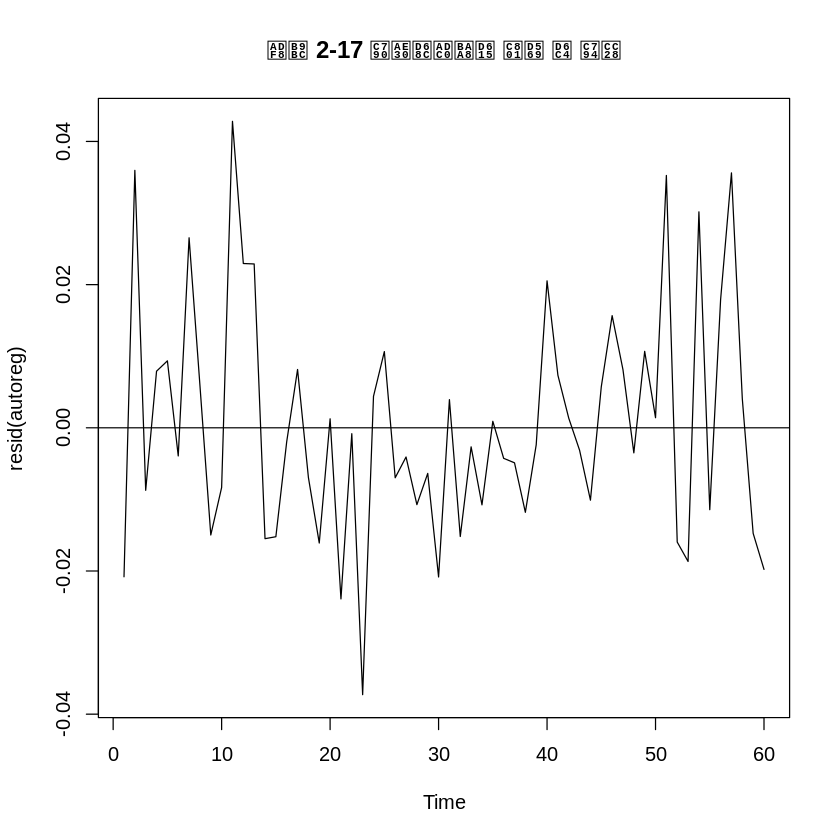

In [ ]:
plot(resid(autoreg), main = "그림 2-17 자기회귀모형 적합 후 잔차")
abline(h = 0)

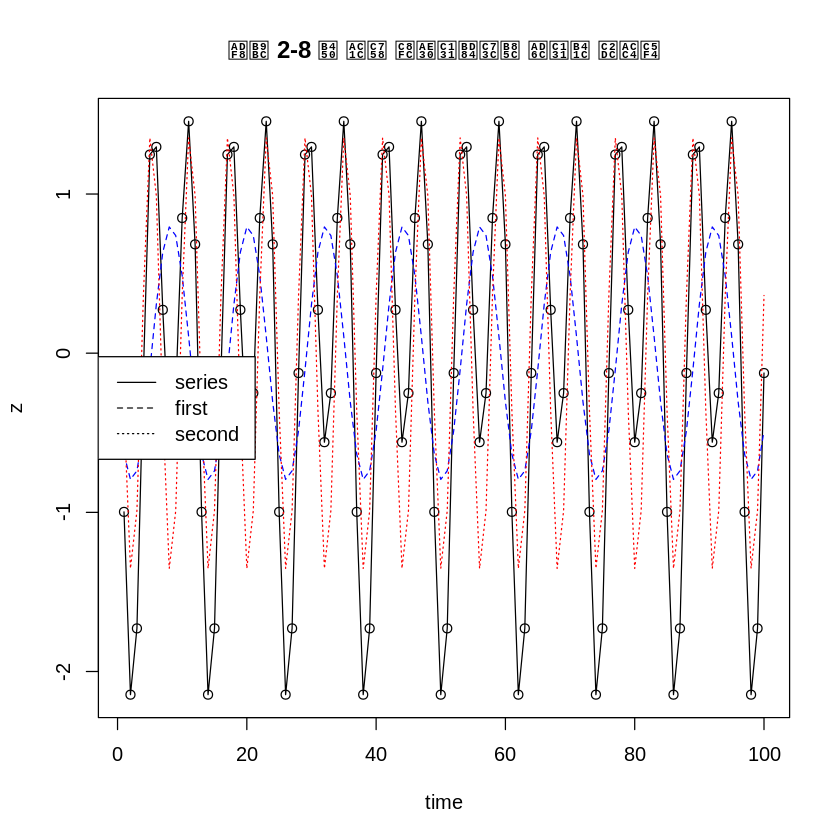

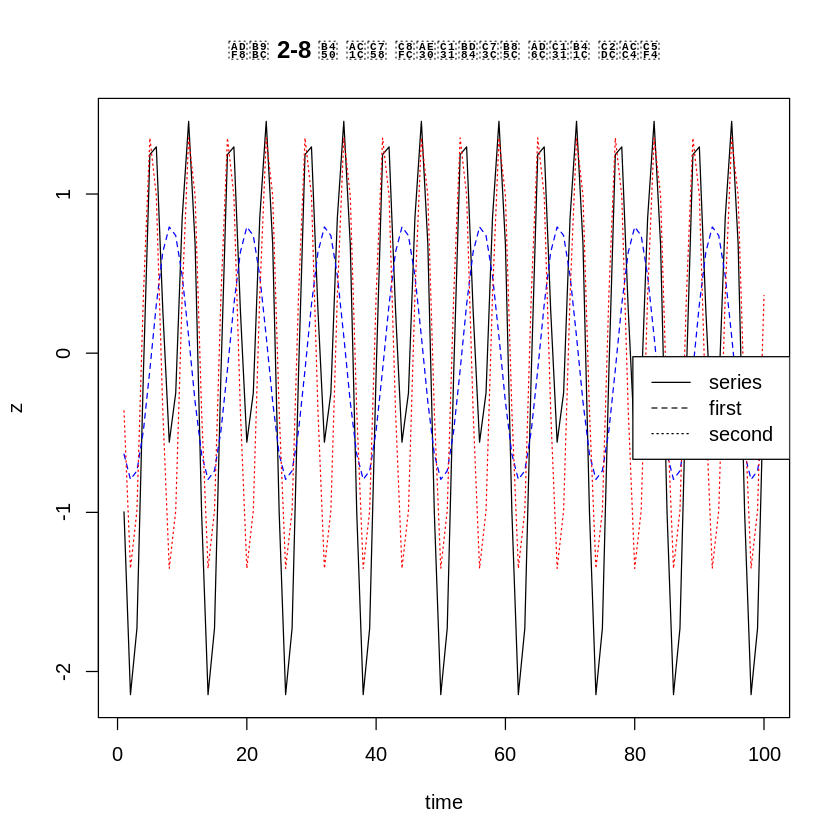

In [ ]:
## Figure 2.8 : 주기성분을 갖는 시계열
n <- 100;
t <- 1:n
a1 <- -0.8;
a2 <- 1.4
phi1 <- pi/8;
phi2 <- 3 * pi/4
first <- a1 * sin(pi * t/6 + phi1) #첫 번째 주기 성분
second <- a2 * sin(pi * t/3 + phi2) #두 번째 주기 성분
z <- first + second
plot(z, type = "o", lty = 1, xlab = "time", ylab = "z", main = "그림 2-8 두 개의 주기성분으로 구성된 시계열")
lines(first, lty = 2, col = "blue")
lines(second, lty = 3, col = "red")
legend("left", legend = c("series", "first", "second"), lty = 1:3)

#data frame 을 이용하는 경우
fig <- data.frame(z, first, second)
ts.plot(fig, col = c("black", "blue", "red"), lty = 1:3, xlab = "time", ylab = "z", main = "그림 2-8 두 개의 주기성분으로 구성된 시계열")
legend("right", legend = c("series", "first", "second"), lty = 1:3)

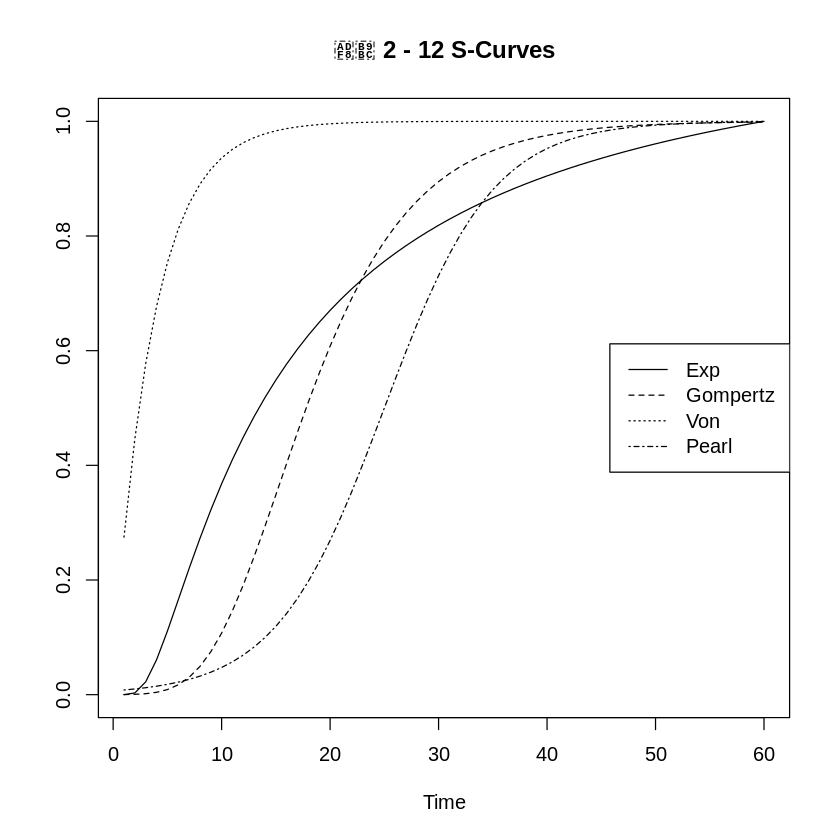

In [ ]:
## Figure 2.12 : S-Curves
b0 = 0.2; b1 = -12; t <- 1:60
z1 <- exp(b0+b1/t)
#Gompertz
b0 = 10; b1= 0.15; k = 1
z2 <- k * exp(-b0*exp(-b1*t))
#Von
b0 = 0.95; b1 = 0.09
z3 <- (1 - b0 * exp((-b1) * t)^3)
# Pear 1
b0 = 5; b1 = -0.2; k = 1
z4 <- k/(1 + exp(b0 + b1 * t))
# Construct data frame
z <- data.frame(z1, z2, z3, z4)
z.ts <- ts(z)
ts.plot(z.ts, lty=1:4, main = "그림 2 - 12 S-Curves")
legend("right", legend = c("Exp", "Gompertz", "Von", "Pearl"), lty = 1:4)